In [29]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [30]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("C:/Users/Valarie/Repos/AI-PT-EAST-OCTOBER-100724/CryptoClustering/Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [31]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [32]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Create a StandardScaler instance 
scaler = StandardScaler() 
# Fit and transform the data 
normalized_data = scaler.fit_transform(market_data_df) 
print(normalized_data)

[[ 5.08529366e-01  4.93193071e-01  7.72200433e-01  2.35459633e-01
  -6.74950963e-02 -3.55953481e-01 -2.51636882e-01]
 [ 1.85445894e-01  9.34445040e-01  5.58692121e-01 -5.43409317e-02
  -2.73482725e-01 -1.15759474e-01 -1.99352110e-01]
 [ 2.17739616e-02 -7.06336853e-01 -2.16804207e-02 -6.10301536e-02
   8.00452481e-03 -5.50246924e-01 -2.82060506e-01]
 [-4.07643829e-02 -8.10928066e-01  2.49457974e-01 -5.03879651e-02
  -3.73164019e-01 -4.58258816e-01 -2.95546142e-01]
 [ 1.19303608e+00  2.00095907e+00  1.76061001e+00  5.45842065e-01
  -2.91202870e-01 -4.99847761e-01 -2.70316950e-01]
 [ 8.91870708e-01  1.32729453e+00  8.00214184e-01 -5.71478992e-02
   7.78653106e-01 -1.88231917e-01 -2.25532605e-01]
 [ 1.13972400e-02  2.57225091e+00  1.10164693e+00 -4.90495415e-01
  -9.31954023e-01  3.87758986e-01 -1.82843995e-02]
 [ 1.02529802e-01  1.50800146e+00  6.48885061e-01  3.28959245e-01
  -4.86348899e-01  6.50796233e-02 -1.55428416e-01]
 [ 7.74971820e-02  3.34296562e-01  8.58519864e-01 -1.26464730e-0

In [33]:
# Create a DataFrame with the scaled data

market_data_scaled=pd.DataFrame(normalized_data,columns=market_data_df.columns)
# Copy the crypto names from the original data
crypto_names=market_data_df.index

# Set the coinid column as index
market_data_scaled["coin_id"]=crypto_names
market_data_scaled=market_data_scaled.set_index("coin_id")
# Display sample data
market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [61]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

,k,inertia
0,1,8.058822
1,2,8.058822
2,3,8.058822
3,4,8.058822
4,5,8.058822
5,6,8.058822
6,7,8.058822
7,8,8.058822
8,9,8.058822
9,10,8.058822


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

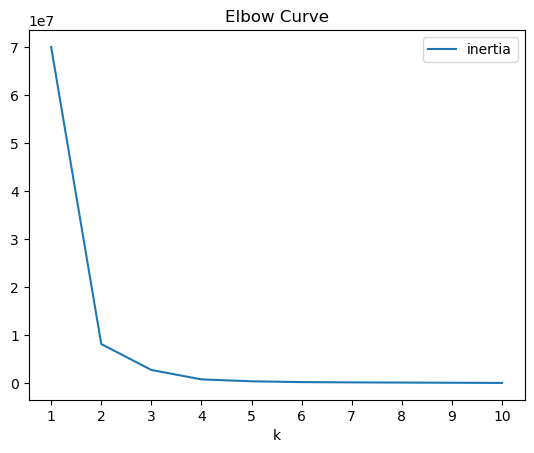

In [35]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer: 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [62]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [63]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df)

c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [38]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(market_data_df)


# View the resulting array of cluster values.
k_4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0])

In [39]:
# Create a copy of the DataFrame
clusters_predicted = market_data_df.copy()

In [95]:
# Add a new column to the DataFrame with the predicted clusters
clusters_predicted['predicted_clusters'] = k_4


# Display sample data
clusters_predicted

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters,predicted_clusters
coin_id,,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

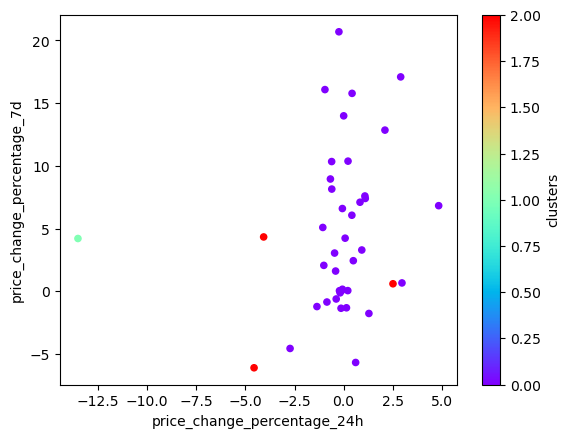

In [41]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clusters_predicted.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="clusters", cmap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [96]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [97]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [98]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [99]:
sum(pca.explained_variance_ratio_)

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895031657030984 or 89.5%

In [46]:
# Create a DataFrame with the scaled data
market_data_scaled=pd.DataFrame(normalized_data,columns=market_data_df.columns)

# Copy the crypto names from the original data
crypto_names=market_data_df.index

# Set the coinid column as index
market_data_scaled["coin_id"]=crypto_names
market_data_scaled=market_data_scaled.set_index("coin_id")

# Display sample data
market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [47]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(market_data_pca, columns=["PCA1", "PCA2", "PCA3"])
market_data_pca_df

# Copy the crypto names from the original data
crypto_names=market_data_df.index


# Set the coinid column as index
market_data_pca_df["coin_id"]=crypto_names
market_data_pca_df=market_data_pca_df.set_index("coin_id")

# Display sample data
market_data_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [48]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(market_data_pca_df)
    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)


# Display the DataFrame
print(elbow_curve_df)

     k     inertia
0    1  256.874086
1    2  182.339530
2    3  135.442408
3    4   49.665497
4    5   38.672582
5    6   34.507577
6    7   23.728365
7    8   18.574523
8    9   15.572672
9   10   11.407667
10  11    8.058822


c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

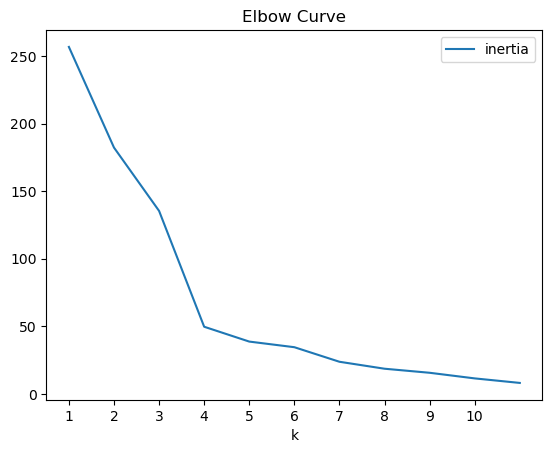

In [49]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it is the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
kMeans_pca = KMeans(n_clusters=k_4, random_state=1)

In [67]:
#Fit the K-Means model using the PCA data
k_model.fit(market_data_pca_df)

c:\Users\Valarie\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=1)

In [72]:
# Predict the clusters to group the cryptocurrencies using the PCA data
#clusters = kMeans.predict(market_data_pca_df)
pca_clusters = k_model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[2 2 5 5 7 2 2 2 2 0 6 5 5 7 0 0 6 0 2 5 5 2 5 5 4 5 0 6 2 9 0 0 3 0 8 4 1
 6 0 5 5]


In [100]:
#create copy of the DataFrame with the PCA data
pca_clustered_df = market_data_pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df["Cluster"] = pca_clusters



# Display sample data
print(pca_clustered_df.head())

                  PCA1      PCA2      PCA3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        5
ripple       -0.471835 -0.222660 -0.479053        5
bitcoin-cash -1.157800  2.041209  1.859715        7


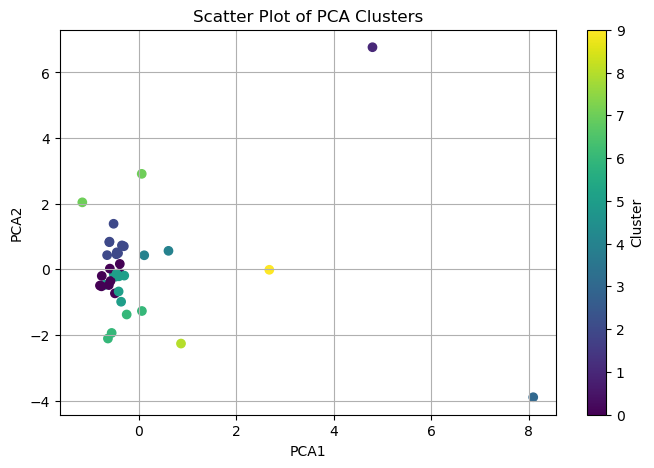

In [114]:

#Create a scatter plot by setting 'x="PCA1"' and 'y="PCA2"'
plt.figure(figsize=(8, 5))
plt.scatter(pca_clustered_df["PCA1"], pca_clustered_df["PCA2"], c=pca_clustered_df["Cluster"], cmap="viridis")
plt.title("Scatter Plot of PCA Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.
weights = pd.DataFrame(
    pca.components_.T,  
    columns=["PCA1", "PCA2", "PCA3"],  
    index=market_data_df.columns  
)

# Display the weights DataFrame
print(weights)

                                  PCA1      PCA2      PCA3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

In [ ]:
For PCA1:
Strongest positive influence is price_change_percentage_200d (0.594468)
Strongest negative influence is price_change_percentage_24h (-0.416728)

For PCA2:
Strongest positive influence is price change percentage_30d (0.562182)
Strongest negative influence is price_change_percentage_1y (-0.150789)

For PCA3:
Strongest positive Influence is price_change_percentage_7d (0.787670).
Strongest Negative Influence is price_change_percentage_60d (-0.361377).